# 2. Differential protein expression analysis

In [1]:
source(file = '~/git/proteogenomics_VT/isobar_mod_functions.R')
library(isobar)
library(ggplot2)
library(RColorBrewer)
library(ggrepel)
library(dplyr)
library(pheatmap)
library(limma)
library(sva)
library(future.apply)
library(reshape2)
library(biomaRt)
library(clusterProfiler)
library(org.Hs.eg.db)
library(DT)
library(msigdbr)
library(impute)
library(ggplotify)
library(plotly)
library(grid)
library(gridExtra)
library(dendextend)


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: impute

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, 

# 2.1. Pre-processing of TMT10plex peptide expression

In [2]:
# load isobar output files (data not included)
target.id.files <- list.files(path='data',pattern='.*.pout.id.csv$',full.names=TRUE)
peaklist.files <- gsub('data','mgf/raw/tagsonly/',target.id.files)
peaklist.files <- gsub('\\..*','.tagsonly.mgf',peaklist.files)


In [3]:
ib <- readIBSpectra(
    type = 'TMT10plexSpectra', 
    id.file = target.id.files,
    peaklist.file = peaklist.files
)


  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_1_rerun.leafcutter_knownNoCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_1_rerun.leafcutter_knownWithCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_1_rerun.leafcutter_novelInferFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_1_rerun.leafcutter_novelNoFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpep

 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_6.leafcutter_novelInferFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_6.leafcutter_novelNoFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_7.leafcutter_knownNoCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160309_RS_MP_HQ_S1_7.leafcutter_knownWithCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequen

 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160310_RS_MP_HQ_S2_4.leafcutter_knownNoCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160310_RS_MP_HQ_S2_4.leafcutter_knownWithCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160310_RS_MP_HQ_S2_4.leafcutter_novelInferFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160310_RS_MP_HQ_S2_4.leafcutter_novelNoFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequen

 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S3_12.leafcutter_novelInferFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S3_12.leafcutter_novelNoFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S3_2.leafcutter_knownNoCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S3_2.leafcutter_knownWithCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequ

 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_10.leafcutter_knownNoCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_10.leafcutter_knownWithCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_10.leafcutter_novelInferFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_10.leafcutter_novelNoFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_se

 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_8.leafcutter_novelInferFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_8.leafcutter_novelNoFrame.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_9.leafcutter_knownNoCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequential/20160312_RS_MP_HQ_S4_9.leafcutter_knownWithCDS.mzid.pout.id.csv [type: ibspectra] ...
 done

  reading id file databasesearch_ESCNPCNeu/mgf_precursorminlen7/leafcutter_sequential/isobar/ensemblpepleafcutter_sequen

## 2.1.1. Normalise data

In [4]:
ib@featureData@data$file <- gsub('\\..*','',ib@featureData@data$spectrum)
ib@featureData@data$batch <- ib@featureData@data$file %>% 
strsplit('_') %>% 
lapply(function(x) x[5]) %>% 
unlist

ib <- ib %>% correctIsotopeImpurities
ib <- ib %>% normalize(per.file=TRUE)


LOG: isotopeImpurities.corrected: TRUE

LOG: is.normalized: TRUE

	normalizing 20160309_RS_MP_HQ_S1_1 [11704 spectra]

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 126: 0.9397

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 127N: 0.8016

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 127C: 0.9971

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 128N: 0.9233

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 128C: 1

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 129N: 0.9531

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 129C: 0.9223

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 130N: 0.8254

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1 channel 130C: 0.7863

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_1

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_5 channel 128C: 0.9776

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_5 channel 129N: 0.9255

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_5 channel 129C: 0.8644

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_5 channel 130N: 0.7599

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_5 channel 130C: 0.7261

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_5 channel 131N: 0.6714

	normalizing 20160309_RS_MP_HQ_S1_6 [11609 spectra]

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_6 channel 126: 0.943

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_6 channel 127N: 0.7661

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_6 channel 127C: 1

LOG: normalization.multiplicative.factor file 20160309_RS_MP_HQ_S1_6 channel 128N: 0.9118

LOG: normalization.multiplicative.factor fil

	normalizing 20160310_RS_MP_HQ_S2_2 [11420 spectra]

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 126: 0.7468

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 127N: 0.7532

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 127C: 0.8063

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 128N: 1

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 128C: 0.7981

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 129N: 0.6787

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 129C: 0.8712

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 130N: 0.8357

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 130C: 0.7099

LOG: normalization.multiplicative.factor file 20160310_RS_MP_HQ_S2_2 channel 131N: 0.7205

	normalizing 20160310_RS_MP_HQ_S2_3 [12740 

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_1 channel 129C: 0.7557

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_1 channel 130N: 0.8127

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_1 channel 130C: 0.6014

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_1 channel 131N: 0.691

	normalizing 20160312_RS_MP_HQ_S3_10 [10783 spectra]

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_10 channel 126: 0.8782

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_10 channel 127N: 0.7402

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_10 channel 127C: 0.8874

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_10 channel 128N: 1

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_10 channel 128C: 0.9066

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_10 channel 129N: 0.9176

LOG: normalization.multiplicative.fac

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 127C: 0.8743

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 128N: 1

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 128C: 0.9106

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 129N: 0.9122

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 129C: 0.7834

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 130N: 0.8503

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 130C: 0.6439

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_7 channel 131N: 0.7443

	normalizing 20160312_RS_MP_HQ_S3_8 [11746 spectra]

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_8 channel 126: 0.8747

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S3_8 channel 127N: 0.7271

LOG: normalization.multiplicative.factor fi

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_3 channel 130C: 0.8624

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_3 channel 131N: 0.8121

	normalizing 20160312_RS_MP_HQ_S4_4 [4276 spectra]

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 126: 0.9368

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 127N: 0.8952

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 127C: 0.9356

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 128N: 0.9436

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 128C: 0.9698

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 129N: 0.7893

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 129C: 0.9769

LOG: normalization.multiplicative.factor file 20160312_RS_MP_HQ_S4_4 channel 130N: 1

LOG: normalization.multiplicative.factor fil

## 2.1.2. Impute protein expression

In [5]:
ions.proteingintensities.imputed <- ib %>% summariseproteinsfromIsobar(verbose=TRUE,impute=TRUE)


Matching ions to peptides...

Matching peptides to proteins...

Summarising spectra intensities to protein.g intensities...

Number of protein.g identified: 10915

Generating protein.g intensity matrix...

Imputing missing protein.g intensities...



Cluster size 17828 broken into 16621 1207 
Cluster size 16621 broken into 13570 3051 
Cluster size 13570 broken into 5568 8002 
Cluster size 5568 broken into 2742 2826 
Cluster size 2742 broken into 705 2037 
Done cluster 705 
Cluster size 2037 broken into 491 1546 
Done cluster 491 
Cluster size 1546 broken into 1169 377 
Done cluster 1169 
Done cluster 377 
Done cluster 1546 
Done cluster 2037 
Done cluster 2742 
Cluster size 2826 broken into 543 2283 
Done cluster 543 
Cluster size 2283 broken into 1205 1078 
Done cluster 1205 
Done cluster 1078 
Done cluster 2283 
Done cluster 2826 
Done cluster 5568 
Cluster size 8002 broken into 3608 4394 
Cluster size 3608 broken into 1682 1926 
Cluster size 1682 broken into 1415 267 
Done cluster 1415 
Done cluster 267 
Done cluster 1682 
Cluster size 1926 broken into 1241 685 
Done cluster 1241 
Done cluster 685 
Done cluster 1926 
Done cluster 3608 
Cluster size 4394 broken into 1100 3294 
Done cluster 1100 
Cluster size 3294 broken into 1246

Output matrix dim: 17828



In [6]:
ions.proteingintensities.imputed <- imputeproteinsfromIsobar.env$ions.proteingintensities.imputed


In [7]:
ions.proteingintensities.imputednorm <- (ions.proteingintensities.imputed %>% t) %/% ((ions.proteingintensities.imputed %>% apply(2,sum)) / (ions.proteingintensities.imputed %>% apply(1,mean) %>% sum)) %>% t


In [8]:
designmatrix <- data.frame(
    CellLine = c('ESC','NPC','ESC','ESC','ESC','ESC','NPC','NPC','NPC','NPC',
                 'NPC','ESC','NPC','NPC','NPC','NPC','ESC','ESC','ESC','ESC',
                 'ESC','NPC','ESC','ESC','ESC','ESC','NPC','NPC','NPC','NPC',
                 'NPC','ESC','NPC','NPC','NPC','NPC','ESC','ESC','ESC','ESC'),
    biorep = c('H9','H9','30Q-1','45Q-1','65Q-1','81Q-1','30Q-1','45Q-1','65Q-1','81Q-1',
               'H9','H9','30Q-2','45Q-2','65Q-2','81Q-2','30Q-2','45Q-2','65Q-2','81Q-2',
               'H9','H9','30Q-3','45Q-3','65Q-3','81Q-3','30Q-3','45Q-3','65Q-3','81Q-3',
               'H9','H9','30Q-4','45Q-4','65Q-4','81Q-4','30Q-4','45Q-4','65Q-4','81Q-4'),
    QLength = factor(rep(c('H9','H9','30Q','45Q','65Q','81Q','30Q','45Q','65Q','81Q'),times = 4),
                     levels = c('H9','30Q','45Q','65Q','81Q')),
    Batch = rep(c('S1','S2','S3','S4'),each = 10),
    row.names = ions.proteingintensities.imputed %>% colnames
)

designmatrix$Condition <- factor(
    paste(designmatrix$CellLine,
          designmatrix$QLength,
          sep = '.'),
    levels = with(unique(expand.grid(c('H9','30Q','45Q','65Q','81Q'),c('ESC','NPC'))),paste0(Var2,'.',Var1))
)


## 2.1.3. Filter proteins by protein FDR

In [9]:
mergedpin.ensemblpepleafcutter_sequential.unimod.mzid.pout.prot.tsv <- read.table(file='mergedpin.ensemblpepleafcutter_sequential.unimod.mzid.pout.prot.tsv.gz',header=TRUE,sep='\t')


In [10]:
mergedpin.ensemblpepleafcutter_sequential.unimod.mzid.pout.prot.tsv %>% 
subset(grepl('^JUNC',ProteinId)) %>% 
with(q.value<=.01) %>% 
table


.
 FALSE   TRUE 
175814  34292 

In [11]:
mergedpin.ensemblpepleafcutter_sequential.unimod.mzid.pout.prot.tsv %>% 
subset(grepl('^JUNC',ProteinId)&q.value<=.01) %>% 
with(ProteinId) %>% unique %>% length


[1] 34292

In [12]:
significantProteinId <- mergedpin.ensemblpepleafcutter_sequential.unimod.mzid.pout.prot.tsv %>% 
subset(!grepl('^ENSP',ProteinId) & q.value<=.01) %>% 
with(ProteinId)


In [13]:
ions.proteingintensities.imputednorm.filtered <- ions.proteingintensities.imputednorm %>% 
subset(
    ions.proteingintensities.imputednorm %>% row.names %>% 
    strsplit(split=',') %>% 
    future_lapply(function(x) {
        (x %in% significantProteinId) %>% any
    }) %>% 
    unlist
)


In [14]:
ions.proteingintensities.imputednorm.filtered %>% dim


[1] 15314    40

## 2.1.4. Batch correction for PCA

In [15]:
ions.proteingintensities.imputednorm.filteredcombat <- ions.proteingintensities.imputednorm.filtered %>% log2 %>% 
ComBat(
    batch=designmatrix$Batch,
    mod=model.matrix(~CellLine+QLength,designmatrix),
    par.prior=TRUE
)


Found4batches

Adjusting for5covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [16]:
prcomp.ions.proteingintensities.imputednorm.filteredcombat <- ions.proteingintensities.imputednorm.filteredcombat %>% na.omit %>% 
t %>% prcomp(scale.=TRUE) %>% summary


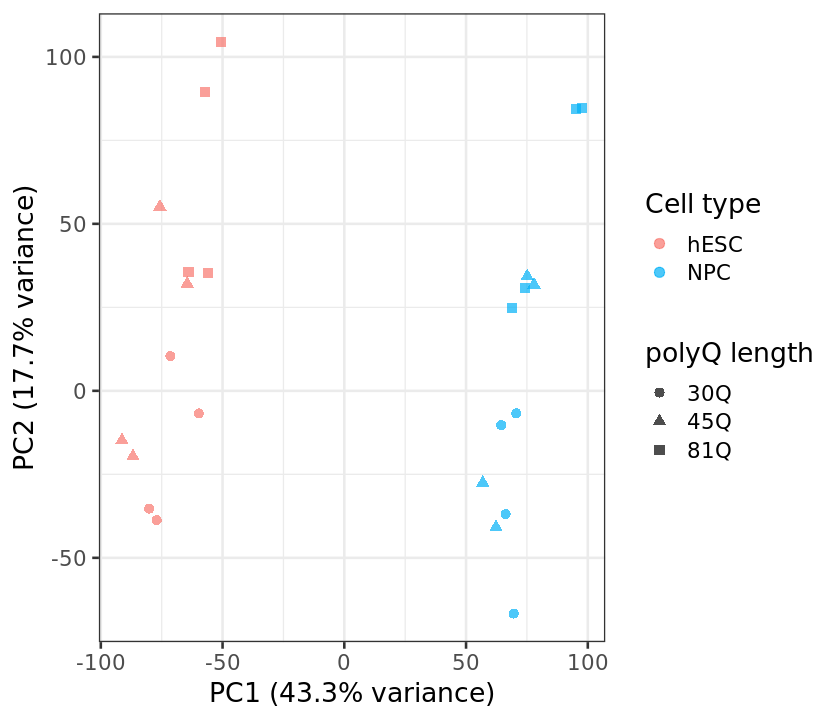

In [17]:
options(repr.plot.width=7,repr.plot.height=6)
g <- prcomp.ions.proteingintensities.imputednorm.filteredcombat$x %>% data.frame %>% 
subset(designmatrix %>% with(QLength!='H9'&QLength!='65Q')) %>% 
ggplot(
    mapping=aes(
        x=PC1,y=PC2,
        color=designmatrix$CellLine %>% subset(designmatrix %>% with(QLength!='H9'&QLength!='65Q')) %>% factor(levels=c('ESC','NPC'),labels=c('hESC','NPC')),
        shape=designmatrix$QLength %>% subset(designmatrix %>% with(QLength!='H9'&QLength!='65Q')),
        text=designmatrix %>% subset(QLength!='H9'&QLength!='65Q') %>% with(Condition)
    )
) +
geom_point(size=2.5,alpha=.7) +
scale_color_manual(name='Cell type',values=c(
    'hESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
    'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]
)) +
scale_shape_discrete(name='polyQ length') +
labs(
    x=paste0('PC1 (',sprintf('%.1f',100*prcomp.ions.proteingintensities.imputednormcombat$importance[2,'PC1']),'% variance)'),
    y=paste0('PC2 (',sprintf('%.1f',100*prcomp.ions.proteingintensities.imputednormcombat$importance[2,'PC2']),'% variance)')
) +
theme_bw(base_size=16)

#g %>% ggplotly(width=700,height=600,tooltip=c('PC1','PC2','text'))
g


# 2.2. Differential protein expression analysis

## 2.2.1. Test for cell type-dependent expression changes

In [18]:
fit.ions.proteingintensities.imputednorm.filtered <- ions.proteingintensities.imputednorm.filtered %>% log2 %>% 
lmFit(design=model.matrix(~CellLine+QLength+Batch,designmatrix)) %>% 
eBayes


In [19]:
fit.ions.proteingintensities.imputednorm.filtered %>% 
topTable(coef=2,number=fit.ions.proteingintensities.imputednorm.filtered %>% nrow) %>% 
with(((logFC %>% abs)>=1&adj.P.Val<=1e-1) %>% table)


.
FALSE  TRUE 
14605   709 

In [20]:
fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC <- fit.ions.proteingintensities.imputednorm.filtered %>% 
topTable(coef=2,number=fit.ions.proteingintensities.imputednorm.filtered %>% nrow) %>% 
subset(((logFC %>% abs)>=(1.5 %>% log2)&adj.P.Val<=1e-1)) %>% 
(function(mydf) {
    data.frame(
        Junctions=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[1]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        Genes=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[2]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        Databases=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[y %>% length]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        mydf,
        row.names=mydf %>% row.names
    )
})


In [21]:
fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC$Databases %>% table


.
     knownNoCDS2     knownWithCDS novelInferFrame2    novelNoFrame2 
              10              828                3                3 

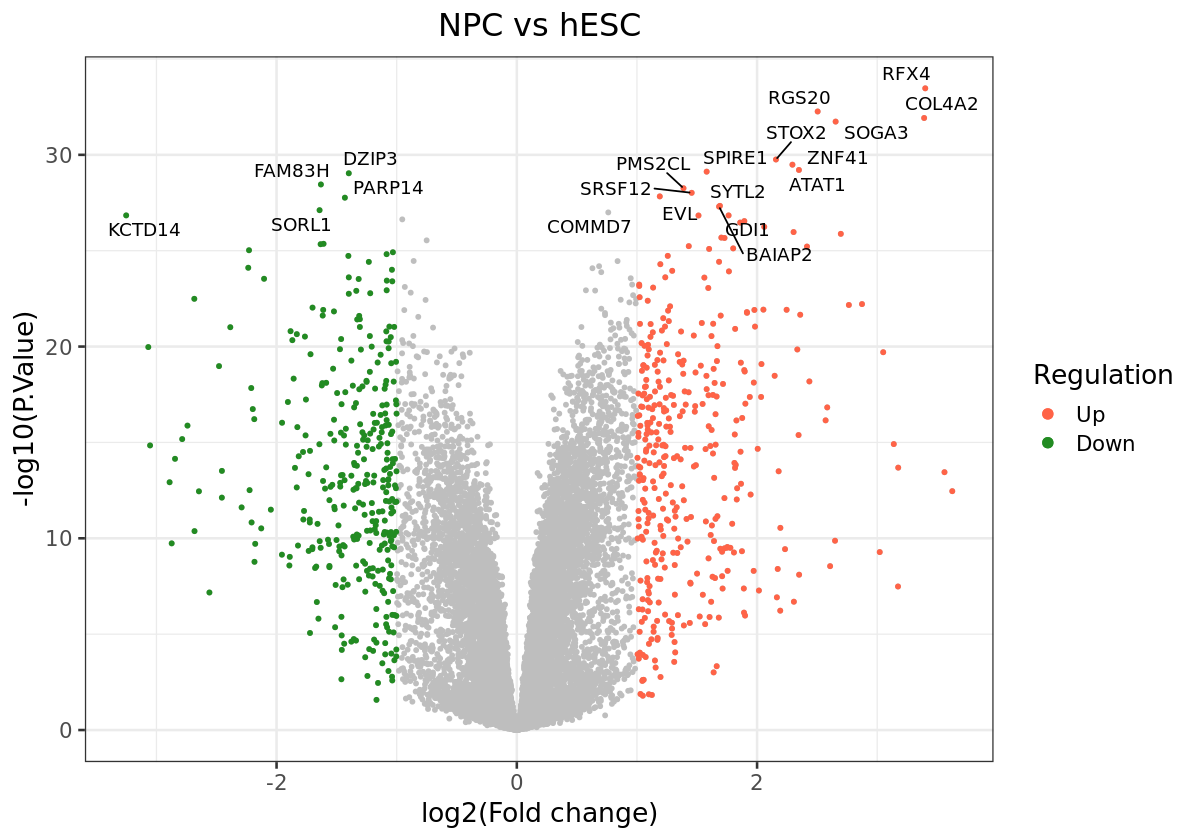

In [22]:
options(repr.plot.height=7,repr.plot.width=10)
fit.ions.proteingintensities.imputednorm.filtered %>% 
topTable(coef=2,number=fit.ions.proteingintensities.imputednorm.filtered %>% nrow) %>% 
(function(mytoptable) {
    mytoptable %>% 
    ggplot(
        mapping=aes(
            x=logFC,
            y=-log10(P.Value)
        )
    ) +
    geom_point(size=1,color='gray') +
    geom_point(data=mytoptable %>% subset(((logFC)>=1)&(adj.P.Val<=.1)),size=1,mapping=aes(color='Up')) +
    geom_point(data=mytoptable %>% subset(((logFC)<=-1)&(adj.P.Val<=.1)),size=1,mapping=aes(color='Down')) +
    scale_color_manual(name='Regulation',values=c('Up'='tomato','Down'='forestgreen')) +
    geom_text_repel(
        data=fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC %>% head(n=20),
        mapping=aes(label=Genes),
        max.overlaps=20
    ) +
    labs(
        title='NPC vs hESC',
        x='log2(Fold change)'
    ) +
    theme_bw(base_size=16) +
    theme(plot.title=element_text(hjust=.5)) +
    guides(color=guide_legend(override.aes=c(size=2.5)))
})


In [23]:
# Differentially expressed peptides based on custom subdatabase
grep(pattern='knownWithCDS',fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC$Databases) %>% length
grep(pattern='knownNoCDS2',fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC$Databases) %>% length
grep(pattern='novelInferFrame2',fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC$Databases) %>% length
grep(pattern='novelNoFrame2',fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC$Databases) %>% length


[1] 828

[1] 10

[1] 3

[1] 3

## 2.2.2. Test for CAG length-dependent expression changes

In [24]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist <- designmatrix.noh9 %>% 
split(f=designmatrix.noh9$CellLine) %>% 
lapply(function(celllinedesignmatrix) {
    ions.proteingintensities.imputednorm.filtered[,celllinedesignmatrix %>% row.names] %>% log2 %>% 
    lmFit(
        design = model.matrix(object=~QLength+Batch,data=celllinedesignmatrix)
    ) %>% eBayes
})


In [25]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist %>% 
lapply(function(myfit) {
    myfit %>% 
    topTable(coef=2:4,number=myfit %>% nrow) %>% 
    with((adj.P.Val<=1e-1) %>% table)
})


$ESC
.
FALSE  TRUE 
15271    43 

$NPC
.
FALSE  TRUE 
14867   447 


In [26]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist %>% 
lapply(function(myfit) {
    myfit %>% 
    topTable(coef=2:4,number=myfit %>% nrow) %>% 
    subset(adj.P.Val<=1e-1)
}) %>% 
lapply(function(mydf) {
    data.frame(
        Junctions=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[1]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        Genes=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[2]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        Databases=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[y %>% length]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        mydf,
        row.names=mydf %>% row.names
    )
})


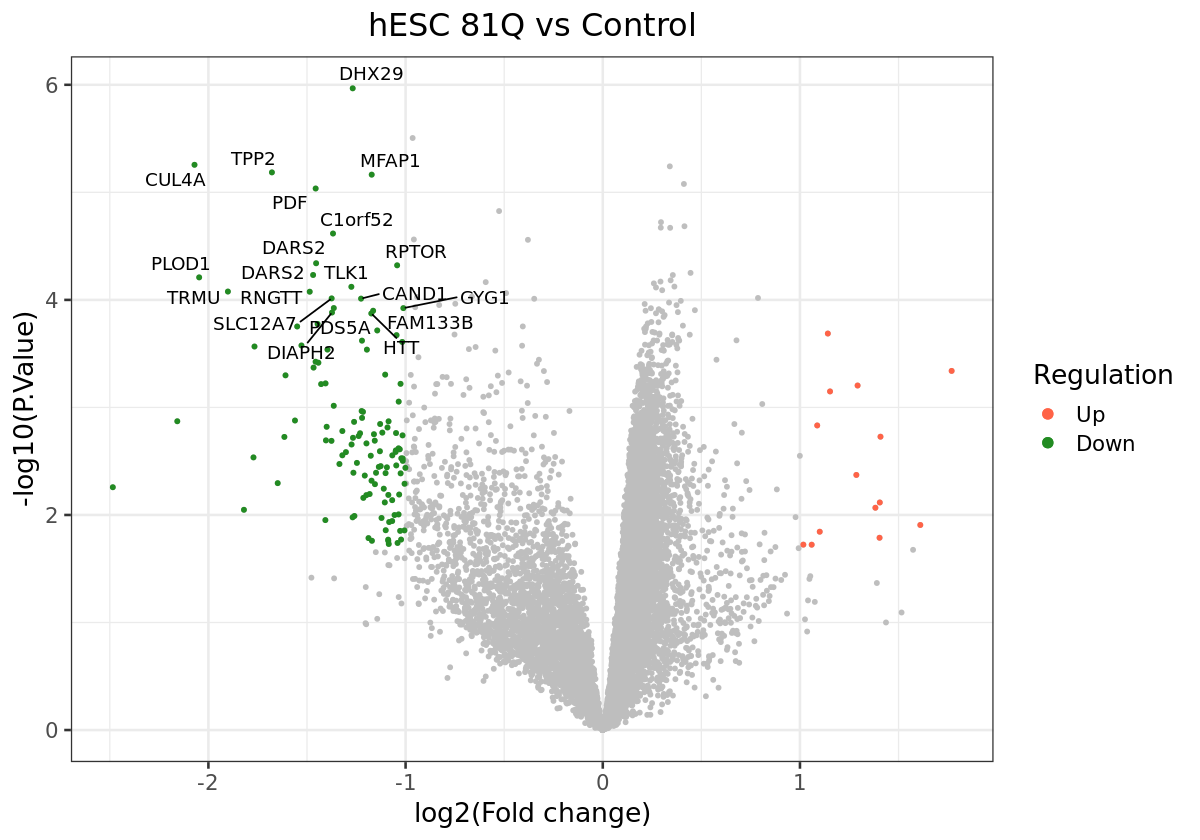

In [27]:
options(repr.plot.height=7,repr.plot.width=10)
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist[['ESC']] %>% 
topTable(coef=4,number=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist[['ESC']] %>% nrow) %>% 
(function(mytoptable) {
    mytoptable %>% 
    ggplot(
        mapping=aes(
            x=logFC,
            y=-log10(P.Value)
        )
    ) +
    geom_point(size=1,color='gray') +
    geom_point(data=mytoptable %>% subset(((logFC)>=1)&(adj.P.Val<=.1)),size=1,mapping=aes(color='Up')) +
    geom_point(data=mytoptable %>% subset(((logFC)<=-1)&(adj.P.Val<=.1)),size=1,mapping=aes(color='Down')) +
    scale_color_manual(name='Regulation',values=c('Up'='tomato','Down'='forestgreen')) +
    geom_text_repel(
        data=mytoptable %>% mutate(Genes=gsub('^JUNC[0-9]*-[0-9]*_|_CDS_.*','',mytoptable %>% row.names)) %>% subset(((logFC %>% abs)>=1)&(adj.P.Val<=.1)) %>% head(n=20),
        mapping=aes(label=Genes),
        max.overlaps=20
    ) +
    labs(
        title='hESC 81Q vs Control',
        x='log2(Fold change)'
    ) +
    theme_bw(base_size=16) +
    theme(plot.title=element_text(hjust=.5)) +
    guides(color=guide_legend(override.aes=c(size=2.5)))
})


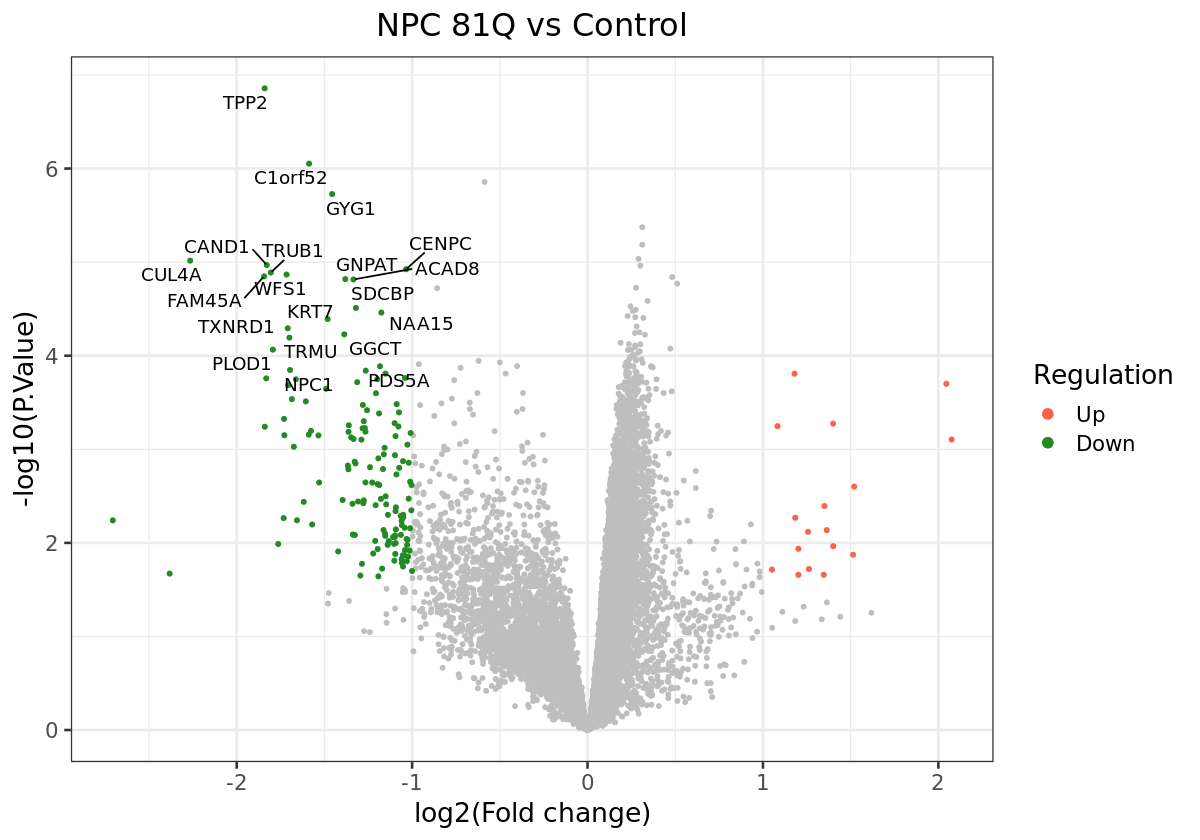

In [28]:
options(repr.plot.height=7,repr.plot.width=10)
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist[['NPC']] %>% 
topTable(coef=4,number=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist[['NPC']] %>% nrow) %>% 
(function(mytoptable) {
    mytoptable %>% 
    ggplot(
        mapping=aes(
            x=logFC,
            y=-log10(P.Value)
        )
    ) +
    geom_point(size=1,color='gray') +
    geom_point(data=mytoptable %>% subset(((logFC)>=1)&(adj.P.Val<=.1)),size=1,mapping=aes(color='Up')) +
    geom_point(data=mytoptable %>% subset(((logFC)<=-1)&(adj.P.Val<=.1)),size=1,mapping=aes(color='Down')) +
    scale_color_manual(name='Regulation',values=c('Up'='tomato','Down'='forestgreen')) +
    geom_text_repel(
        data=mytoptable %>% mutate(Genes=gsub('^JUNC[0-9]*-[0-9]*_|_CDS_.*','',mytoptable %>% row.names)) %>% subset(((logFC %>% abs)>=1)&(adj.P.Val<=.1)) %>% head(n=20),
        mapping=aes(label=Genes),
        max.overlaps=20
    ) +
    labs(
        title='NPC 81Q vs Control',
        x='log2(Fold change)'
    ) +
    theme_bw(base_size=16) +
    theme(plot.title=element_text(hjust=.5)) +
    guides(color=guide_legend(override.aes=c(size=2.5)))
})


In [29]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist %>% 
lapply(function(myfit) {
    myfit %>% 
    topTable(coef=2:4,number=myfit %>% nrow) %>% 
    subset(adj.P.Val<=1e-1)
}) %>% 
(function(dflist) do.call(rbind,dflist)) %>% 
(function(mydf) {
    data.frame(
        Junctions=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[1]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        Genes=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[2]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        Databases=mydf %>% row.names %>% 
        strsplit(split=',') %>% 
        lapply(function(x) x %>% strsplit(split='_') %>% lapply(function(y) y[y %>% length]) %>% unique %>% paste(sep=',',collapse=',')) %>% 
        unlist,
        mydf,
        row.names=mydf %>% row.names
    )
})


In [30]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT$Databases %>% table


.
 knownNoCDS2 knownWithCDS 
           3          487 

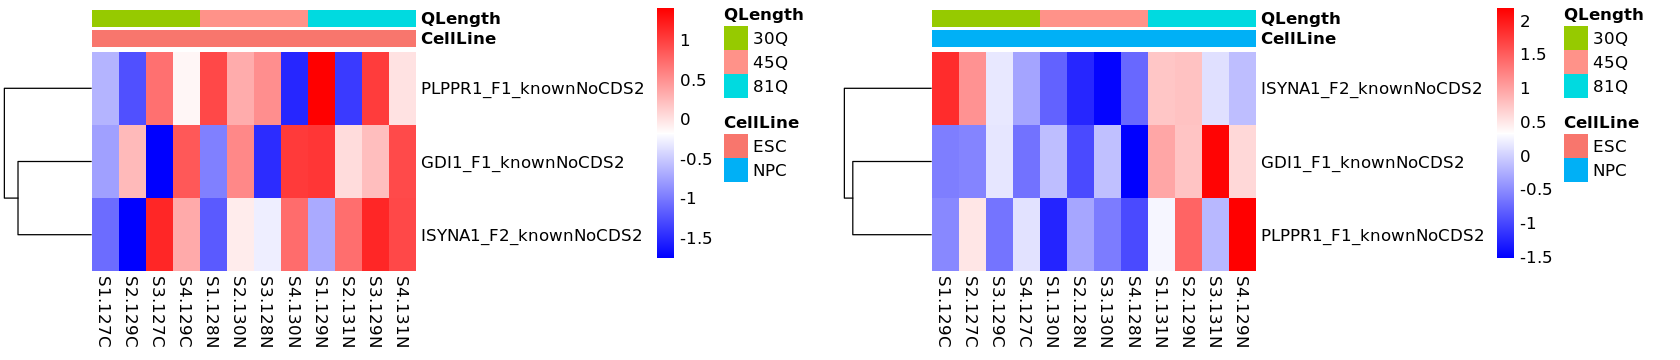

In [31]:
# Differentially expressed peptides with no known CDS shared in hESC and NPC
options(repr.plot.height=3,repr.plot.width=14)
grid.arrange(
    grobs=list(
        ions.proteingintensities.imputednormcombat[
            gsub('^NPC\\.','',fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT %>% 
            subset(!grepl('knownWithCDS',Databases)) %>% row.names),
            designmatrix[,c(1,3,4)] %>% subset(CellLine=='ESC'&!grepl('H9|65Q',QLength)) %>% row.names
        ] %>% 
        (function(mymat) {
            row.names(mymat) <- gsub('.*[0-9][0-9][0-9]_','',mymat %>% row.names)
            mymat <- mymat[
                ,
                designmatrix[,c(1,3,4)] %>% 
                subset(CellLine=='ESC'&!grepl('H9|65Q',QLength)) %>% 
                with(order(CellLine,QLength))
            ]
            mymat
        }) %>% 
        t %>% scale %>% t %>% 
        pheatmap(
            annotation_colors=list(
                CellLine=c(
                    'ESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
                    'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]
                )
            ),
            silent=TRUE,
            border_color=NA,
            color=colorRampPalette(colors=c('blue','white','red'))(255),
            annotation_col=designmatrix[,c(1,3)],
            cluster_cols=FALSE
        ) %>% as.ggplot,
        ions.proteingintensities.imputednormcombat[
            gsub('^NPC\\.','',fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT %>% 
            subset(!grepl('knownWithCDS',Databases)) %>% row.names),
            designmatrix[,c(1,3,4)] %>% subset(CellLine=='NPC'&!grepl('H9|65Q',QLength)) %>% row.names
        ] %>% 
        (function(mymat) {
            row.names(mymat) <- gsub('.*[0-9][0-9][0-9]_','',mymat %>% row.names)
            mymat <- mymat[
                ,
                designmatrix[,c(1,3,4)] %>% 
                subset(CellLine=='NPC'&!grepl('H9|65Q',QLength)) %>% 
                with(order(CellLine,QLength))
            ]
            mymat
        }) %>% 
        t %>% scale %>% t %>% 
        pheatmap(
            annotation_colors=list(
                CellLine=c(
                    'ESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
                    'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]
                )
            ),
            silent=TRUE,
            border_color=NA,
            color=colorRampPalette(colors=c('blue','white','red'))(255),
            annotation_col=designmatrix[,c(1,3)],
            cluster_cols=FALSE
        ) %>% as.ggplot
    ),
    layout_matrix=matrix(1:2,nrow=1)
)


# 2.3. Differential spliced junction-associated peptides

In [32]:
leafcutterAStable_human_ESCNPCNeu_isoHD.significantintronjunctionsintersectlistlongrenameddf.vastdbevents.tsv <- read.table(
    file='/data/data/proteogenomics/vincent/20211015_human_ESCNPCNeu_isoHD/leafcutterAStable_human_ESCNPCNeu_isoHD.significantintronjunctionsintersectlistlongrenameddf.vastdbevents.tsv',
    sep='\t'
) %>% 
subset(!grepl('^disease_stage_',DiffSplicing.test))


## 2.3.1. Cell type-dependent diff. spliced peptides

In [33]:
fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC.anno <- data.frame(
    ProteinId = fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC %>% row.names,
    fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC
) %>% 
merge(
    y=hg38samtags,
    by.x='Genes',by.y='gene_name',
    all.x=TRUE
)


In [34]:
# leafcutter
toptablecelllinenpc_inJunction <- fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC.anno %>% 
with(ProteinId) %>% 
strsplit(split='\\+') %>% 
lapply(function(myjunc) {
    myjunc <- gsub('-.*','',myjunc)
    (myjunc %in% (
        leafcutterAStable_human_ESCNPCNeu_isoHD.significantintronjunctionsintersectlistlongrenameddf.tsv %>% 
        subset(ClusterASType!='Unknown'&ds.test=='Cell_type_NPCvsESC'&!grepl('^Neuron_',ds.test)) %>% 
        with(Junction))) %>% any
}) %>% 
unlist

toptablecelllinenpc_inJunction %>% table


.
FALSE  TRUE 
 1758   446 

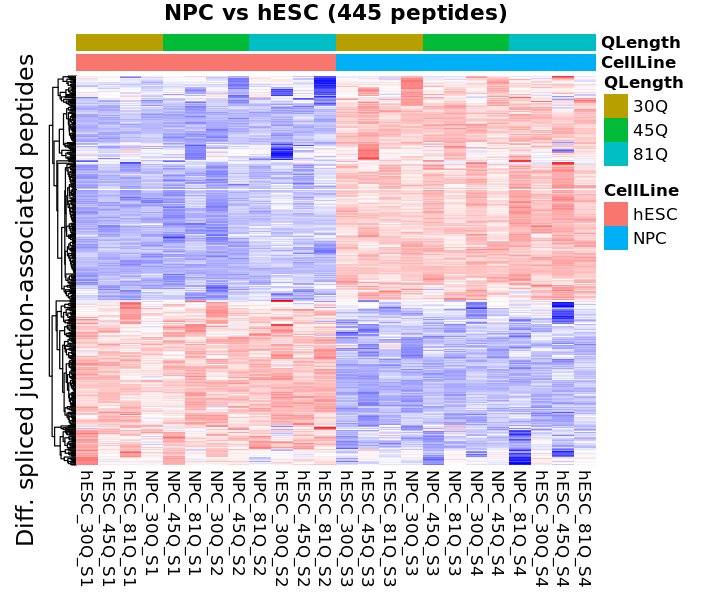

In [35]:
options(repr.plot.height=5,repr.plot.width=6)
hclustcol <- ions.proteingintensities.imputednorm.filteredcombat[
    fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC.anno %>% 
    subset({
        (
            Junctions=toptablecelllinenpc_inJunction
        )
    }) %>% 
    with(ProteinId) %>% unique,
    designmatrix2 %>% subset(QLength!='H9'&QLength!='65Q') %>% row.names
] %>% 
t %>% scale %>% na.omit %>% 
dist %>% hclust
hclustcol <- hclustcol %>% as.dendrogram %>% rotate(hclustcol %>% with(labels[order][c(13:24,1:12)])) %>% as.hclust

g <- ions.proteingintensities.imputednorm.filteredcombat[
    fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC.anno %>% 
    subset({
        (
            Junctions=toptablecelllinenpc_inJunction
        )
    }) %>% 
    with(ProteinId) %>% unique,
    designmatrix2 %>% subset(QLength!='H9'&QLength!='65Q') %>% arrange(CellLine,QLength) %>% row.names
] %>% 
t %>% scale %>% t %>% 
pheatmap(
    silent=TRUE,
    cluster_cols=FALSE,
    color=colorRampPalette(colors=c('blue','white','red'))(255),
    legend=FALSE,
    treeheight_row=12,treeheight_col=16,
    show_rownames=FALSE,
    labels_col=designmatrix2[,c(1,3,4)] %>% subset(QLength!='H9'&QLength!='65Q') %>% with(paste0(CellLine,'_',QLength,'_',Batch)),
    annotation_col=designmatrix2[,c(1,3)] %>% subset(QLength!='H9'&QLength!='65Q'),
    border_color=NA,drop=TRUE,
    annotation_colors=list(
        QLength=c(
            '30Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[2],
            '45Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[3],
            '81Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4]
        ),
        CellLine=c(
            'hESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
            'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]
    )),
    main=paste0('NPC vs hESC (',fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC.anno %>% 
    subset({
        (
            Junctions=toptablecelllinenpc_inJunction
        )
    }) %>% 
    with(ProteinId) %>% unique %>% length,' peptides)')
) %>% as.ggplot

grid.arrange(
    ggplot()+geom_text(mapping=aes(x=0,y=0,label=paste0('Diff. spliced junction-associated peptides')),size=5,angle=90)+theme_void(),
    g,
    layout_matrix=matrix(c(rep(1,1),rep(2,14)),nrow=1)
)


### Functional enrichment of Gene Ontology terms

In [36]:
toptablecelllinenpc_inJunctionUnique_enrichGOBP <- fit.ions.proteingintensities.imputednorm.filtered.toptableCellLineNPC.anno %>% 
subset({
    (
        Junctions=toptablecelllinenpc_inJunction
    )
}) %>% 
with(gene_id %>% unique %>% sort) %>% 
enrichGO(
    OrgDb=org.Hs.eg.db,
    keyType='ENSEMBL',
    ont='BP',
    pvalueCutoff=1,qvalueCutoff=1,
    universe=ensembl_gene_idsuniverse
)


In [37]:
toptablecelllinenpc_inJunctionUnique_enrichGOBP2 <- toptablecelllinenpc_inJunctionUnique_enrichGOBP %>% 
pairwise_termsim %>% simplify(cutoff=0.7,by="p.adjust",select_fun=min)


In [38]:
toptablecelllinenpc_inJunctionUnique_enrichGOBP2 %>% data.frame %>% head(n=25)


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0034330,GO:0034330,cell junction organization,39/379,279/5985,1.696020e-06,0.005776642,0.005675417,ENSG00000065320/ENSG00000065613/ENSG00000069188/ENSG00000075340/ENSG00000077264/ENSG00000083937/ENSG00000091129/ENSG00000091409/ENSG00000092969/ENSG00000095637/ENSG00000099864/ENSG00000100625/ENSG00000104067/ENSG00000105649/ENSG00000114867/ENSG00000119139/ENSG00000125753/ENSG00000130396/ENSG00000130402/ENSG00000131711/ENSG00000134318/ENSG00000134873/ENSG00000136279/ENSG00000136848/ENSG00000138758/ENSG00000140575/ENSG00000142192/ENSG00000148798/ENSG00000150471/ENSG00000162458/ENSG00000163539/ENSG00000166086/ENSG00000171723/ENSG00000172020/ENSG00000175866/ENSG00000182985/ENSG00000187498/ENSG00000188153/ENSG00000197555,39
GO:0051960,GO:0051960,regulation of nervous system development,44/379,359/5985,1.256163e-05,0.018391223,0.018068949,ENSG00000007372/ENSG00000018189/ENSG00000065320/ENSG00000068903/ENSG00000077264/ENSG00000078018/ENSG00000082684/ENSG00000088305/ENSG00000091129/ENSG00000091409/ENSG00000092421/ENSG00000100078/ENSG00000100097/ENSG00000100503/ENSG00000100625/ENSG00000101160/ENSG00000101391/ENSG00000107104/ENSG00000114867/ENSG00000115310/ENSG00000120833/ENSG00000131711/ENSG00000136044/ENSG00000136279/ENSG00000136848/ENSG00000137642/ENSG00000140262/ENSG00000140575/ENSG00000140600/ENSG00000142192/ENSG00000150471/ENSG00000151239/ENSG00000155363/ENSG00000166145/ENSG00000168505/ENSG00000169750/ENSG00000171316/ENSG00000172020/ENSG00000174405/ENSG00000175866/ENSG00000185483/ENSG00000197555/ENSG00000215397/ENSG00000243678,44
GO:0007155,GO:0007155,cell adhesion,50/379,438/5985,2.260340e-05,0.018391223,0.018068949,ENSG00000002330/ENSG00000019582/ENSG00000051382/ENSG00000065320/ENSG00000065613/ENSG00000069188/ENSG00000075340/ENSG00000077264/ENSG00000091129/ENSG00000091409/ENSG00000092421/ENSG00000092969/ENSG00000095637/ENSG00000100097/ENSG00000104067/ENSG00000104312/ENSG00000107104/ENSG00000107186/ENSG00000108679/ENSG00000112851/ENSG00000119139/ENSG00000129116/ENSG00000130396/ENSG00000130402/ENSG00000134318/ENSG00000134873/ENSG00000138735/ENSG00000140416/ENSG00000140545/ENSG00000140575/ENSG00000142192/ENSG00000143126/ENSG00000145012/ENSG00000148204/ENSG00000149294/ENSG00000150471/ENSG00000154134/ENSG00000158813/ENSG00000160963/ENSG00000162458/ENSG00000163539/ENSG00000166086/ENSG00000167614/ENSG00000167642/ENSG00000169750/ENSG00000172889/ENSG00000175866/ENSG00000182985/ENSG00000196159/ENSG00000243678,50
GO:0022610,GO:0022610,biological adhesion,50/379,440/5985,2.558744e-05,0.018391223,0.018068949,ENSG00000002330/ENSG00000019582/ENSG00000051382/ENSG00000065320/ENSG00000065613/ENSG00000069188/ENSG00000075340/ENSG00000077264/ENSG00000091129/ENSG00000091409/ENSG00000092421/ENSG00000092969/ENSG00000095637/ENSG00000100097/ENSG00000104067/ENSG00000104312/ENSG00000107104/ENSG00000107186/ENSG00000108679/ENSG00000112851/ENSG00000119139/ENSG00000129116/ENSG00000130396/ENSG00000130402/ENSG00000134318/ENSG00000134873/ENSG00000138735/ENSG00000140416/ENSG00000140545/ENSG00000140575/ENSG00000142192/ENSG00000143126/ENSG00000145012/ENSG00000148204/ENSG00000149294/ENSG00000150471/ENSG00000154134/ENSG00000158813/ENSG00000160963/ENSG00000162458/ENSG00000163539/ENSG00000166086/ENSG00000167614/ENSG00000167642/ENSG00000169750/ENSG00000172889/ENSG00000175866/ENSG00000182985/ENSG00000196159/ENSG00000243678,50
GO:0060284,GO:0060284,regulation of cell development,44/379,370/5985,2.699827e-05,0.018391223,0.018068949,ENSG00000002330/ENSG00000007372/ENSG00000018189/ENSG00000065320/ENSG00000068903/ENSG00000077264/ENSG00000078018/ENSG00000082684/ENSG00000088305/ENSG00000091129/ENSG00000091409/ENSG00000092421/ENSG00000100078/ENSG00000100097/ENSG00000100503/ENSG00000101160/ENSG00000101391/ENSG00000107104/ENSG00000114867/ENSG00000115310/ENSG00000120833/ENSG00000130402/ENSG00000131711/ENSG00000134318/ENSG00000136044/ENSG00000136279/ENSG0000013

## 2.3.2. CAG length-dependent diff. spliced peptides

In [39]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.list %>% 
lapply(function(mydf) {
    data.frame(
        ProteinId = mydf %>% row.names,
        mydf
    ) %>% 
    merge(
        y=hg38samtags,
        by.x='Genes',by.y='gene_name',
        all.x=TRUE
    )
})


In [40]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% 
lapply(function(mydf) {
    mydf %>% 
    arrange(-gene_version) %>% 
    subset(!(ProteinId %>% duplicated))
})


In [41]:
# leafcutter
toptablepolyq_inJunction.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% 
lapply(with,{
    ProteinId %>% 
    strsplit(split='\\+') %>% 
    lapply(function(myjunc) {
        myjunc <- gsub('-.*','',myjunc)
        (myjunc %in% (leafcutterAStable_human_ESCNPCNeu_isoHD.significantintronjunctionsintersectlistlongrenameddf.tsv %>% subset(ds.test!='Cell_type_NPCvsESC'&!grepl('^Neuron_',ds.test)) %>% with(Junction))) %>% any
    }) %>% 
    unlist
})

toptablepolyq_inJunction.list %>% lapply(table)


$ESC

FALSE  TRUE 
   32    11 

$NPC

FALSE  TRUE 
  351    96 


In [42]:
# leafcutter
toptablepolyq_inJunction.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names %>% 
lapply(function(celltypename) {
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[celltypename]] %>% 
    with(
        ProteinId %>% 
        strsplit(split='\\+') %>% 
        lapply(function(myjunc) {
            myjunc <- gsub('-.*','',myjunc)
            (myjunc %in% (leafcutterAStable_human_ESCNPCNeu_isoHD.significantintronjunctionsintersectlistlongrenameddf.tsv %>% subset(ClusterASType!='Unknown'&ds.test!='Cell_type_NPCvsESC') %>% with(Junction))) %>% any #grepl(paste0('^',celltypename),ds.test)
        }) %>% 
        unlist
    )
}) %>% 
setNames(nm=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names)

toptablepolyq_inJunction.list %>% lapply(table)


$ESC

FALSE  TRUE 
   32    11 

$NPC

FALSE  TRUE 
  347   100 


### 2.3.2.1. CAG length-dependent DSJ peptides in hESC

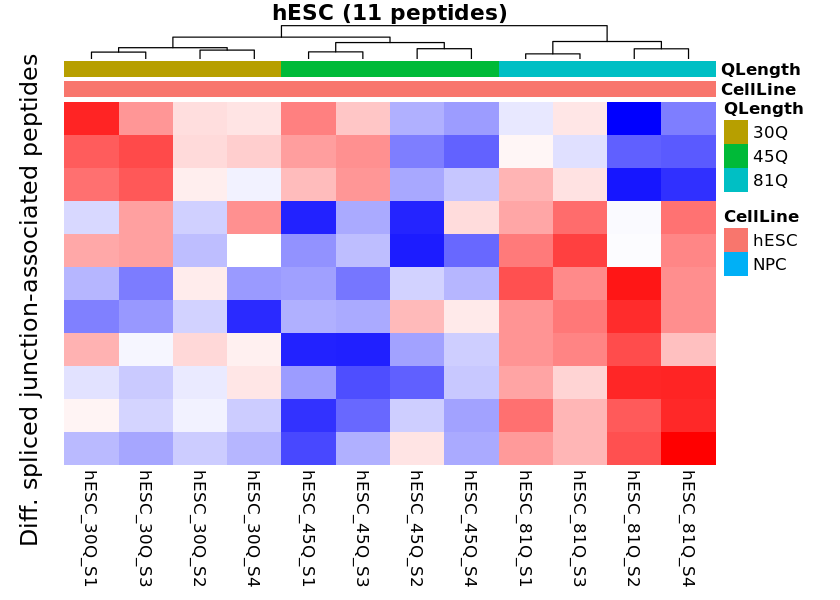

In [43]:
options(repr.plot.height=5,repr.plot.width=7)

hclustcols <- ions.proteingintensities.imputednorm.filteredcombat[
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[1]] %>% 
    subset(
        toptablepolyq_inJunction.list[[1]]# & !toptablepolyq_inGene.list[[1]]
    ) %>% 
    with(ProteinId),
    designmatrix2 %>% with(CellLine=='hESC'&QLength!='H9'&QLength!='65Q')
] %>% 
t %>% scale %>% dist %>% hclust
hclustcols <- hclustcols %>% as.dendrogram %>% rotate(hclustcols %>% with(labels[order][c(5:12,1:4)])) %>% as.hclust
#message(hclustcols$labels %>% length)

hclustrows <- ions.proteingintensities.imputednorm.filteredcombat[
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[1]] %>% 
    subset(
        toptablepolyq_inJunction.list[[1]]# & !toptablepolyq_inGene.list[[1]]
    ) %>% 
    with(ProteinId),
    designmatrix2 %>% with(CellLine=='hESC'&QLength!='H9'&QLength!='65Q')
] %>% 
t %>% scale %>% t %>% dist %>% hclust

g1 <- ions.proteingintensities.imputednorm.filteredcombat[
#fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[1]] %>% 
    #subset(
    #    toptablepolyq_inJunction.list[[1]]# & !toptablepolyq_inGene.list[[1]]
    #) %>% 
    #with(ProteinId),
    hclustrows %>% with(labels[order]),
    designmatrix2 %>% with(CellLine=='hESC'&QLength!='H9'&QLength!='65Q')] %>% 
t %>% scale %>% t %>% 
pheatmap(
         legend=FALSE,
    treeheight_row=12,treeheight_col=16,
    color=colorRampPalette(colors=c('blue','white','red'))(255),
    cluster_cols=hclustcols,
    cluster_rows=FALSE,
    labels_row=gsub('[\\+,].*|_CDS_.*|_F[123]_.*','',hclustrows %>% with(labels[order])),
    show_rownames=FALSE,
    labels_col=designmatrix2[,c(1,3,4)] %>% subset(CellLine=='hESC'&QLength!='H9'&QLength!='65Q') %>% with(paste0(CellLine,'_',QLength,'_',Batch)),
    annotation_col=designmatrix2[,c(1,3)] %>% subset(CellLine=='hESC'&QLength!='H9'&QLength!='65Q'),
    border_color=NA,drop=FALSE,
    annotation_colors=list(
        QLength=c(
            '30Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[2],
            '45Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[3],
            #'65Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4],
            '81Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4]
        ),
        CellLine=c(
            'hESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
            'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]#,
            #'Neuron'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[5]
    )),
    main=paste0('hESC',' (',(toptablepolyq_inJunction.list[[1]]) %>% sum,' peptides)'),
    silent=TRUE
) %>% as.ggplot

grid.arrange(
    ggplot()+geom_text(mapping=aes(x=0,y=0,
        label=paste0('Diff. spliced junction-associated peptides')
                                  ),size=5,angle=90)+theme_void(),
    g1,
    layout_matrix=matrix(c(1,rep(2,14)),nrow=1,byrow=TRUE)
)


### 2.3.2.2. CAG length-dependent DSJ peptides in NPC

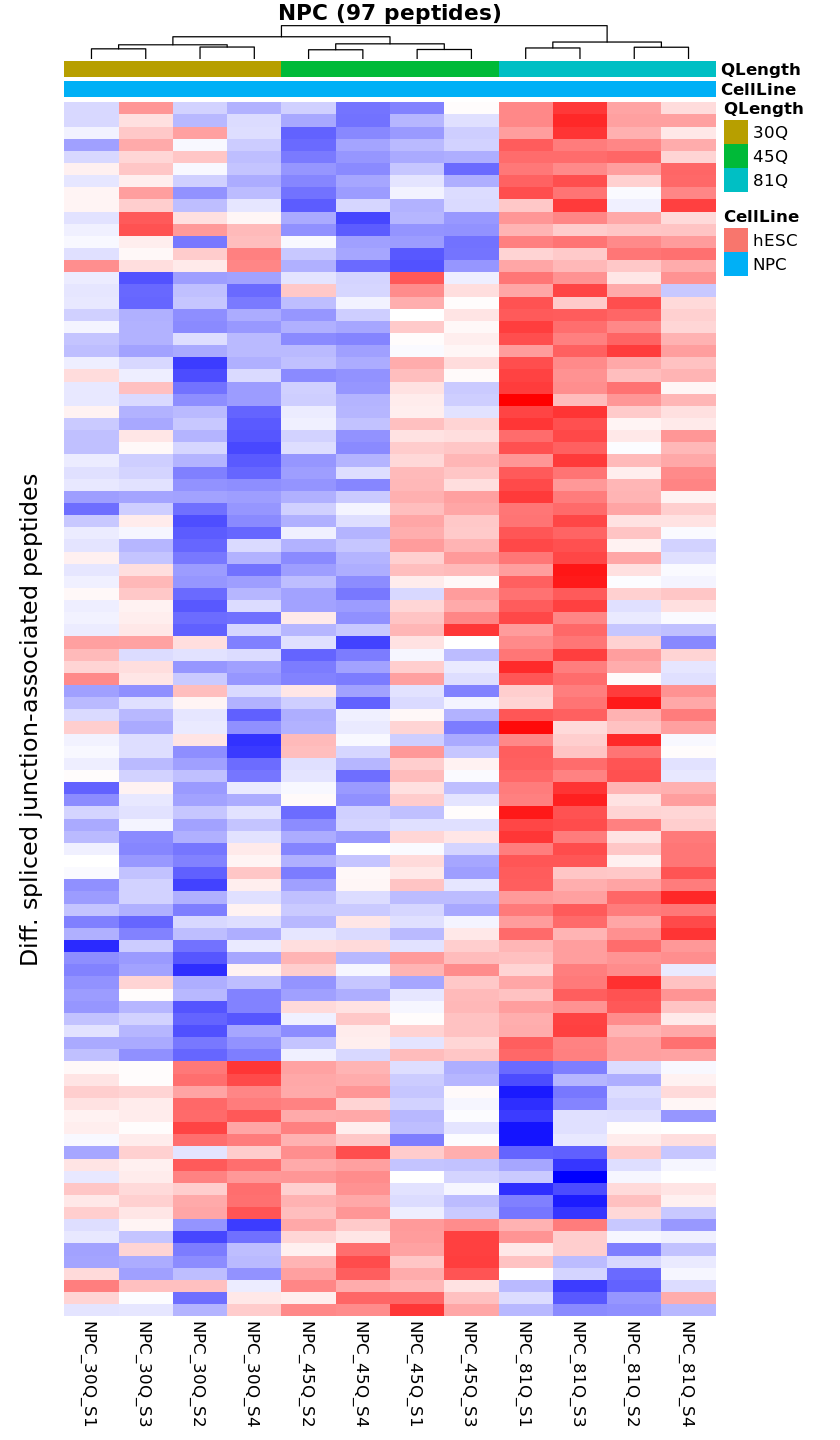

In [44]:
options(repr.plot.height=12,repr.plot.width=7)

hclustcols <- ions.proteingintensities.imputednorm.filteredcombat[
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[2]] %>% 
    subset(
        toptablepolyq_inJunction.list[[2]]# & !toptablepolyq_inGene.list[[2]]
    ) %>% 
    with(ProteinId),
    designmatrix2 %>% with(CellLine=='NPC'&QLength!='H9'&QLength!='65Q')
] %>% 
t %>% scale %>% dist %>% hclust
hclustcols <- hclustcols %>% as.dendrogram %>% rotate(hclustcols %>% with(labels[order][c(5:12,1:4)])) %>% as.hclust
#message(hclustcols$labels %>% length)

hclustrows <- ions.proteingintensities.imputednorm.filteredcombat[
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[2]] %>% 
    subset(
        toptablepolyq_inJunction.list[[2]]# & !toptablepolyq_inGene.list[[2]]
    ) %>% 
    with(ProteinId),
    designmatrix2 %>% with(CellLine=='NPC'&QLength!='H9'&QLength!='65Q')
] %>% 
t %>% scale %>% t %>% dist %>% hclust

g2 <- ions.proteingintensities.imputednorm.filteredcombat[
#fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[2]] %>% 
    #subset(
    #    toptablepolyq_inJunction.list[[2]]# & !toptablepolyq_inGene.list[[2]]
    #) %>% 
    #with(ProteinId),
    hclustrows %>% with(labels[order]),
    designmatrix2 %>% with(CellLine=='NPC'&QLength!='H9'&QLength!='65Q')] %>% 
t %>% scale %>% t %>% 
pheatmap(fontsize_row=5,
         legend=FALSE,
    treeheight_row=12,treeheight_col=16,
    color=colorRampPalette(colors=c('blue','white','red'))(255),
    cluster_cols=hclustcols,
    cluster_rows=FALSE,
    labels_row=gsub('[\\+,].*|_CDS_.*|_F[123]_.*','',hclustrows %>% with(labels[order])),
    show_rownames=FALSE,
    labels_col=designmatrix2[,c(1,3,4)] %>% subset(CellLine=='NPC'&QLength!='H9'&QLength!='65Q') %>% with(paste0(CellLine,'_',QLength,'_',Batch)),
    annotation_col=designmatrix2[,c(1,3)] %>% subset(CellLine=='NPC'&QLength!='H9'&QLength!='65Q'),
    border_color=NA,drop=FALSE,
    annotation_colors=list(
        QLength=c(
            '30Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[2],
            '45Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[3],
            #'65Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4],
            '81Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4]
        ),
        CellLine=c(
            'hESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
            'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]#,
            #'Neuron'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[5]
    )),
    main=paste0('NPC',' (',(toptablepolyq_inJunction.list[[2]] & !toptablepolyq_inGene.list[[2]]) %>% sum,' peptides)'),
    silent=TRUE
) %>% as.ggplot

grid.arrange(
    ggplot()+geom_text(mapping=aes(x=0,y=0,
        label=paste0('Diff. spliced junction-associated peptides')
                                  ),size=5,angle=90)+theme_void(),
    g2,
    layout_matrix=matrix(c(1,rep(2,14)),nrow=1,byrow=TRUE)
)


In [45]:
fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names %>% 
lapply(function(cellline) {
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[cellline]] %>% 
    subset(
        (
            Junction=toptablepolyq_inJunction.list[[cellline]]
        )
    ) %>% 
    with(Genes %>% unique %>% sort)
}) %>% 
setNames(nm=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names)


$ESC
 [1] "BABAM1"  "C1orf52" "CEP250"  "CUL4A"   "NCOR1"   "PDF"     "SPATA33"
 [8] "SPCS2"   "SRGAP2"  "SSBP2"   "TSEN54" 

$NPC
 [1] "ACAD8"    "AFDN"     "ALDH6A1"  "ANK2"     "ARID1A"   "ASCC3"   
 [7] "ATP6V1B2" "BICRA"    "BRD7"     "C1orf52"  "CAND1"    "CC2D1A"  
[13] "CDKN1A"   "CEP55"    "CHD3"     "CTNND1"   "CUEDC1"   "CUL4A"   
[19] "DCX"      "DHRS4"    "DHX30"    "DHX33"    "ELOVL2"   "EPB41L1" 
[25] "FANCA"    "FIP1L1"   "FKBP5"    "GALT"     "GBF1"     "GGCT"    
[31] "GLTP"     "GTF2I"    "GYG1"     "HAUS1"    "HCCS"     "HRAS"    
[37] "HSPG2"    "IQSEC2"   "KIF5C"    "KIFC1"    "KLC1"     "KLC2"    
[43] "LIMA1"    "LRRC8A"   "MACF1"    "MAP2"     "MAP6"     "MARK3"   
[49] "MTA3"     "MTCL1"    "NAA15"    "NASP"     "NCAPH"    "NCBP3"   
[55] "NFASC"    "NOL9"     "NTMT1"    "OTUD7B"   "PANK2"    "PAPOLG"  
[61] "PARD3"    "PCP4"     "PDF"      "PINX1"    "PPFIA1"   "PPP1R7"  
[67] "PPP2R5A"  "PPP6R3"   "PRPF6"    "PTBP3"    "PTGIS"    "PTK2"    
[73] "PTMS"     "PTPN2"    "RPL19"    "RUFY3"    "SAC3D1"   "SDSL"    
[79] "SEC31A"   "SEPT11"   "SH3GLB1"  "SLC25A37" "SLC44A1"  "STAM"    
[85] "TAF15"    "TRMT11"   "TSEN54"   "TSR1"     "TXNRD1"   "UNC119"  
[91] "USP25"    "WASHC2A"  "WDR59"    "WDR76"    "WTAP"     "ZYX"

### 2.3.2.3. CAG length-dependent DSJ peptides common between hESC and NPC

In [46]:
Reduce(
    f=intersect,
    x=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names %>% 
    lapply(function(cellline) {
        fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[cellline]] %>% 
        subset(
            (
                Junction=toptablepolyq_inJunction.list[[cellline]]
            ) #& !(
                #Gene=toptablepolyq_inGene.list[[cellline]]
            #)
        ) %>% 
        with(Genes %>% unique %>% sort)
    }) %>% 
    setNames(nm=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names)
)


[1] "C1orf52" "CUL4A"   "PDF"     "TSEN54"

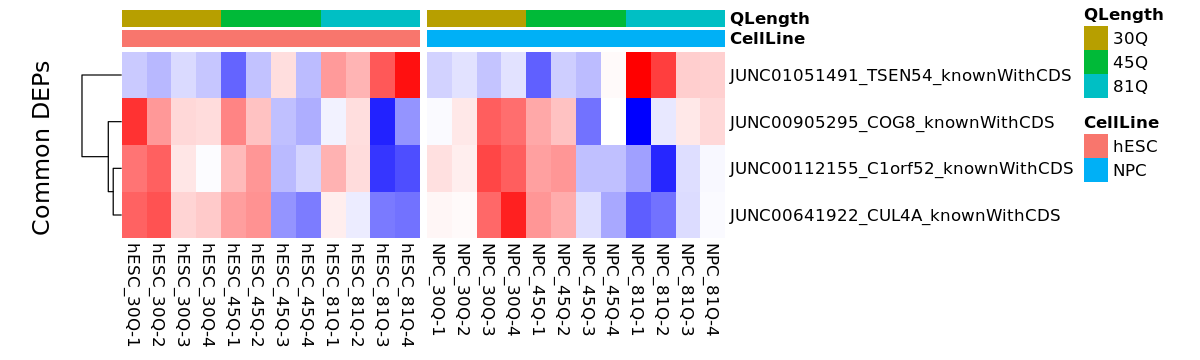

In [47]:
hclustcols1 <- ions.proteingintensities.imputednorm.filteredcombat[
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[1]] %>% 
    subset(
        toptablepolyq_inJunction.list[[1]]# & !toptablepolyq_inGene.list[[1]]
    ) %>% 
    with(ProteinId),
    designmatrix2 %>% with(CellLine=='hESC'&QLength!='H9'&QLength!='65Q')
] %>% 
t %>% scale %>% dist %>% hclust
hclustcols1 <- hclustcols1 %>% as.dendrogram %>% rotate(hclustcols1 %>% with(labels[order][c(5:12,1:4)])) %>% as.hclust

hclustcols2 <- ions.proteingintensities.imputednorm.filteredcombat[
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[2]] %>% 
    subset(
        toptablepolyq_inJunction.list[[2]]# & !toptablepolyq_inGene.list[[2]]
    ) %>% 
    with(ProteinId),
    designmatrix2 %>% with(CellLine=='NPC'&QLength!='H9'&QLength!='65Q')
] %>% 
t %>% scale %>% dist %>% hclust
hclustcols2 <- hclustcols2 %>% as.dendrogram %>% rotate(hclustcols2 %>% with(labels[order][c(5:12,1:4)])) %>% as.hclust

options(repr.plot.height=3,repr.plot.width=10)
g <- cbind(
    ions.proteingintensities.imputednorm.filteredcombat[
        c('JUNC00112155-001_C1orf52_CDS_F1_knownWithCDS','JUNC00641922-001_CUL4A_CDS_F1_knownWithCDS','JUNC00905295-001_PDF_CDS_F1_knownWithCDS','JUNC01051491-003_TSEN54_CDS_F1+JUNC01051526-002_TSEN54_CDS_F1_knownWithCDS'),
        hclustcols1 %>% with(labels[order])
    ] %>% t %>% scale %>% t,
    ions.proteingintensities.imputednorm.filteredcombat[
        c('JUNC00112155-001_C1orf52_CDS_F1_knownWithCDS','JUNC00641922-001_CUL4A_CDS_F1_knownWithCDS','JUNC00905295-001_PDF_CDS_F1_knownWithCDS','JUNC01051491-003_TSEN54_CDS_F1+JUNC01051526-002_TSEN54_CDS_F1_knownWithCDS'),
        hclustcols2 %>% with(labels[order])
    ] %>% t %>% scale %>% t    
) %>% 
pheatmap(gaps_col=12,
    legend=FALSE,annotation_legend=TRUE,annotation_names_col=TRUE,
    treeheight_row=20,
    color=colorRampPalette(colors=c('blue','white','red'))(255),
    cluster_cols=FALSE,
    cluster_rows=TRUE,
    labels_row=c('JUNC00112155_C1orf52_knownWithCDS','JUNC00641922_CUL4A_knownWithCDS','JUNC00905295_COG8_knownWithCDS','JUNC01051491_TSEN54_knownWithCDS'),
    show_rownames=TRUE,
    labels_col=designmatrix2 %>% subset(QLength!='H9'&QLength!='65Q') %>% arrange(CellLine,QLength) %>% 
    with(paste(CellLine,biorep,sep='_')),
    annotation_col=designmatrix2[,c(1,3)] %>% subset(QLength!='H9'&QLength!='65Q'),
    border_color=NA,drop=FALSE,
    annotation_colors=list(
        QLength=c(
            '30Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[2],
            '45Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[3],
            #'65Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4],
            '81Q'=hcl(h=seq(15,375,length=6+1),l=65,c=100)[4]
        ),
        CellLine=c(
            'hESC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[1],
            'NPC'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[4]#,
            #'Neuron'=hcl(h=seq(15,375,length=5+1),l=65,c=100)[5]
    )),
    #main=paste0('NPC'),
    silent=TRUE
) %>% as.ggplot

grid.arrange(
    ggplot()+geom_text(mapping=aes(x=0,y=0,
        label=paste0('\tCommon DEPs')
                                  ),size=5,angle=90)+theme_void(),
    g,
    layout_matrix=matrix(c(1,rep(2,14)),nrow=1,byrow=TRUE)
)


### Functional enrichment in Gene Ontology terms

In [48]:
gene_id.leafcutter_polyqlrt.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names %>% 
lapply(function(cellline) {
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[cellline]] %>% 
    subset(
        (
            Junction=toptablepolyq_inJunction.list[[cellline]]
        )
    ) %>% 
    with(gene_id %>% unique %>% sort)
}) %>% 
setNames(nm=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names)


In [49]:
gene_id.leafcutter_polyqlrt.enrichGOBP.list <- fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names %>% 
lapply(function(cellline) {
    fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list[[cellline]] %>% 
    subset(
        (
            Junction=toptablepolyq_inJunction.list[[cellline]]
        )
    ) %>% 
    with(gene_id %>% unique %>% sort)
}) %>% 
setNames(nm=fitqlength.ions.proteingintensities.imputednorm.filtered.celllinelist.toptablepolyQLRT.anno.list %>% names) %>% 
lapply(function(geneids) {
    geneids %>% 
    enrichGO(
        OrgDb=org.Hs.eg.db,
        keyType='ENSEMBL',
        ont='BP',
        pvalueCutoff=1,qvalueCutoff=1,
        universe=ensembl_gene_idsuniverse
    )
})


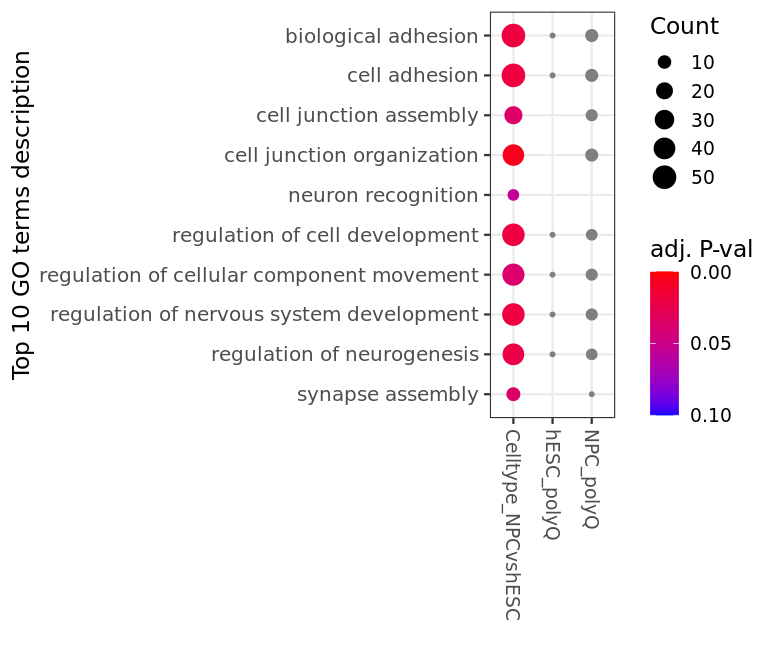

In [50]:
options(repr.plot.height=5.5,repr.plot.width=6.5)
rbind(
    data.frame(
        (toptablecelllinenpc_inJunctionUnique_enrichGOBP2 %>% data.frame)[toptablecelllinenpc_inJunctionUnique_enrichGOBP2 %>% data.frame %>% head(n=10) %>% row.names,],
        Dataset='Celltype_NPCvshESC'
    ),
    data.frame(
        (gene_id.leafcutter_polyqlrt.enrichGOBP.list[[1]] %>% data.frame)[toptablecelllinenpc_inJunctionUnique_enrichGOBP2 %>% data.frame %>% head(n=10) %>% row.names,],
        Dataset='hESC_polyQ'
    ),
    data.frame(
        (gene_id.leafcutter_polyqlrt.enrichGOBP.list[[2]] %>% data.frame)[toptablecelllinenpc_inJunctionUnique_enrichGOBP2 %>% data.frame %>% head(n=10) %>% row.names,],
        Dataset='NPC_polyQ'
    )
) %>% na.omit %>% 
ggplot(
    mapping=aes(
        x=Dataset,
        y=Description %>% factor(levels=Description %>% factor %>% levels %>% rev),
        color=p.adjust,
        size=Count
    )
) +
geom_point() +
scale_color_gradient(
    name='adj. P-val',
    low='red',high='blue',limits=c(0,.1),breaks=c(0,.05,.1)
) +
theme_bw(base_size=14) +
guides(color=guide_colorbar(reverse=TRUE)) +
labs(
    #title='Enriched GO terms',
    x='',
    y='Top 10 GO terms description'
) +
theme(
    axis.text.x=element_text(angle=270,hjust=0,vjust=.5),
    axis.text.y=element_text(size=12,vjust=.5),
    plot.title=element_text(hjust=0)
)


In [51]:
sessionInfo()


R version 4.0.2 (2020-06-22)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /opt/miniconda3/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3          pheatmap_1.0.12        dendextend_1.15.1     
 [4] plotly_4.10.0          ggplotify_0.1.0        msigdbr_7.2.1         
 [7] DT_0.16                org.Hs.eg.db_3.12.0    AnnotationDbi_1.52.0  
[10] IRanges_2.24.1         S4Vectors_0.28.1       cluster